In [31]:
import pandas as pd
import seaborn as sb
import numpy as np
import os
import matplotlib.pyplot as mp
from scipy.stats import binom, nbinom, t, f , norm, poisson, chi2

In [ ]:
# rvs = randon variate sample, vai gerar numeros aleatorios de acordo com uma distribuição
# fazer usando orientação a objetos, funcoes 'def', ou usando apenas 'IFs'?
# usar seaborn que é mais fácil ou matplotlib que é mais elaborado?
# usar 'Dash' para storytelling? 'pygame'? precisa-se de algo similar ao Rshiny
# fazer arquivo executável ou um link web?


In [50]:
# classe distribuição
class distribuicao:
    def __init__(self, tipo:str, parametro1:float, parametro2:float, parametro3:float ):
        self.tipo = tipo
        self.parametro1 = parametro1
        self.parametro2 = parametro2
        self.parametro3 = parametro3
    
    def gerar_amostra(self):
        if self.tipo == 'binom':
            dist_binomial = binom(self.parametro1, self.parametro2)
            amostra = dist_binomial.rvs(size = self.parametro3)
            print(amostra)
            mp.hist(amostra, bins=10)
            mp.xlabel('valores')
            mp.ylabel('frequencia')

            print('essa distribuicao é binomial')
        

        elif self.tipo == 'nbinom':            
            dist_nbinomial = nbinom(self.parametro1, self.parametro2)
            amostra = dist_nbinomial.rvs(size = self.parametro3)
            print(amostra)
            mp.hist(amostra, bins=10)
            mp.xlabel('valores')
            mp.ylabel('frequencia')

            print('essa distribuicao é binomial negativa')

                
        elif self.tipo == 'poisson':            
            dist_poisson = poisson(self.parametro1)
            amostra = dist_poisson.rvs(size = self.parametro2)
            print(amostra)
            mp.hist(amostra, bins=10)
            mp.xlabel('valores')
            mp.ylabel('frequencia')

            print('essa distribuicao é poisson')

        
           

[51 56 42 53 56 57 48 54 44 47 50 49 57 48 52 52 50 48 57 56 43 49 40 40
 45 46 50 54 45 43 56 48 47 47 44 60 49 51 51 60 51 56 39 59 51 49 53 54
 45 55 54 50 55 47 44 46 54 61 49 58 50 51 58 51 44 44 49 50 52 51 42 49
 54 48 48 42 50 51 58 59 47 48 53 55 43 54 50 52 52 53 49 57 60 47 51 44
 49 47 38 54]
essa distribuicao é binomial


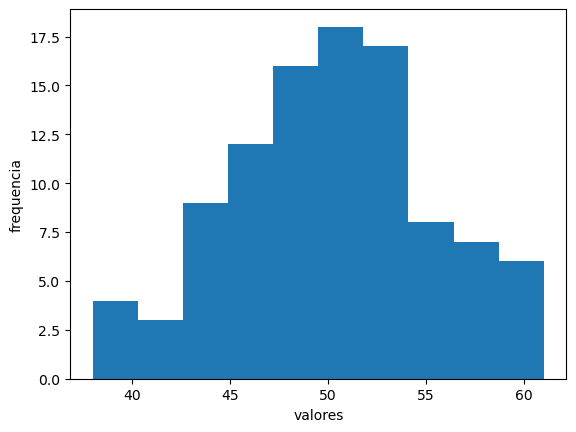

In [51]:
Distribuicao = distribuicao(tipo = 'binom', parametro1 = 100, parametro2 = 0.5 , parametro3 = 100)
Distribuicao.gerar_amostra()